In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Titanic_data.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

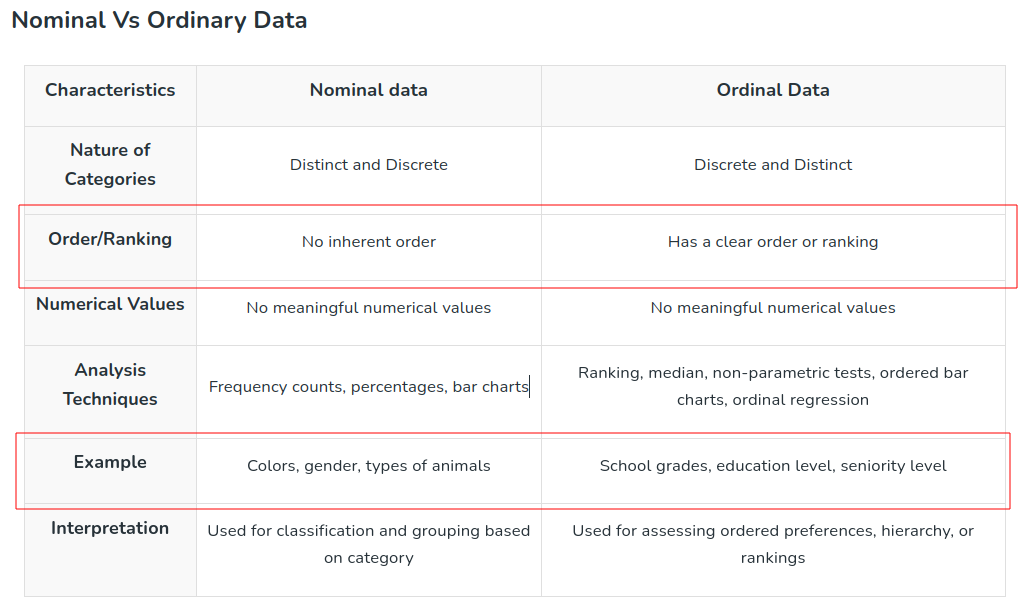

## Nominal Data

In [6]:
df["Sex"] #< Nominal Data

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

### One Hot Encoding

In [14]:
# Pandas
pd.get_dummies(df, columns=['Sex', "Embarked"], dtype=int).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [18]:
# sklearn
# !pip install scikit-learn

from sklearn.preprocessing import OneHotEncoder

In [42]:
df[['Sex','Embarked']].to_numpy()

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], shape=(891, 2), dtype=object)

In [47]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_gender = one_hot_encoder.fit_transform(df[['Sex']].to_numpy())

In [48]:
encoded_gender

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], shape=(891, 2))

In [49]:
one_hot_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [50]:
one_hot_encoder.inverse_transform(
    [[1,0],
     [0,1]]
)

array([['female'],
       ['male']], dtype=object)

## Ordinal Data

In [51]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

### Label Encoding

In [59]:
# pandas
df['Embarked_label'], rule = df['Embarked'].factorize()

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [61]:
# Sklearn
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encode = LabelEncoder()

encoded_emb = label_encode.fit_transform(df['Embarked'])

In [69]:
label_encode.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [70]:
label_encode.inverse_transform([0,2,1,1,3,0])

array(['C', 'S', 'Q', 'Q', nan, 'C'], dtype=object)